# Topic
 I present the development process of a powerful "Resume Screening App" using Python. The app leverages the capabilities of Artificial Intelligence and Natural Language Processing to automate the resume screening and applicant evaluation process. By utilizing machine learning techniques, the app efficiently matches job requirements with applicant skills, streamlining the hiring process for recruiters and HR professionals.

# Resume Dataset Link

https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset


In [1]:
# !pip install numpy pandas matplotlib seaborn

1. NumPy: NumPy is a library for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.

2. Pandas: Pandas is a powerful data manipulation and analysis library for Python, offering data structures and operations for manipulating numerical tables and time series data.

3. Matplotlib: Matplotlib is a plotting library for Python that produces publication-quality figures in a variety of formats and interactive environments across platforms.

4. Seaborn: Seaborn is a statistical data visualization library based on Matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading a csv file

df = pd.read_csv('UpdatedResumeDataSet.csv')

In [55]:
#  This code displays the first few rows of a DataFrame stored in the variable df

df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


# dataset have two fields 
1. category - telling about job description
2. resume - contains information about them 

In [56]:
# This code retrieves the dimensions (number of rows and columns) of the DataFrame stored in the variable df.

df.shape

(962, 2)

# Exploring Categories

In [57]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [58]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

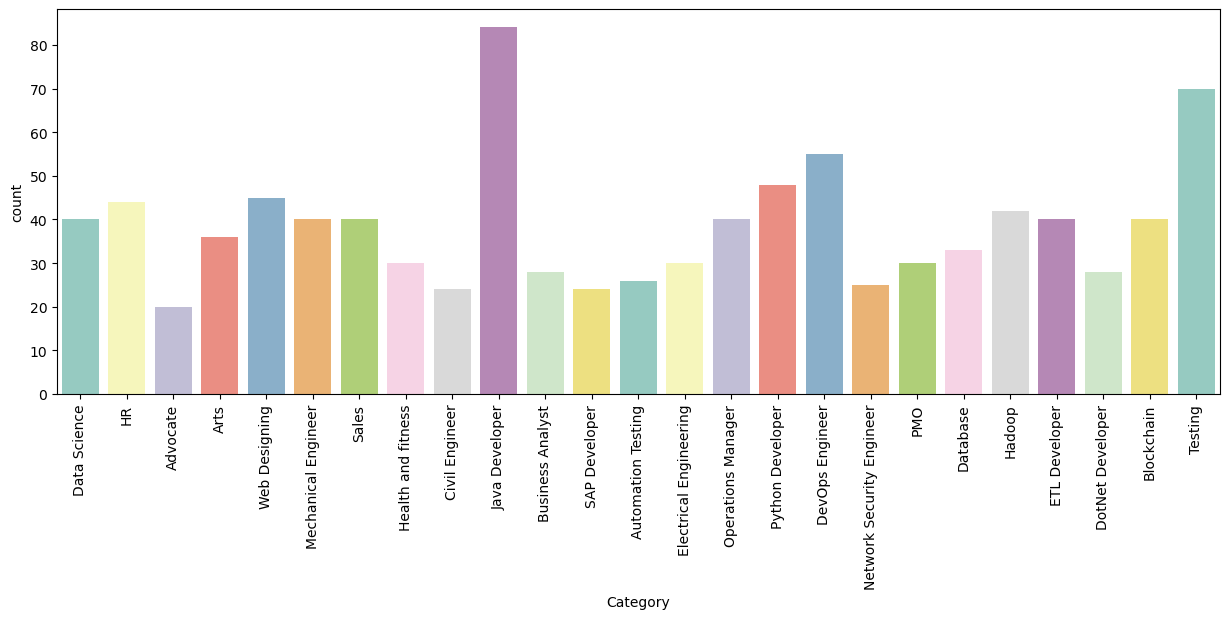

In [59]:
# Now i will visualize the data

# Here, i want to check which categories is more
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='Category', hue='Category', palette='Set3', legend=False)  
# Assigning 'Category' to both x and hue, and setting legend=False
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()


# This code creates a countplot visualization of the 'Category' column in the DataFrame using Seaborn, 
# with each category colored differently and disabling the legend, then displays it with Matplotlib. 
# Additionally, it adjusts the x-axis labels to be rotated vertically for better readability.

From the graph i can say that we have total 80 resume and the java developer has highest resume and lowest resume has Adovacte resume

In [60]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

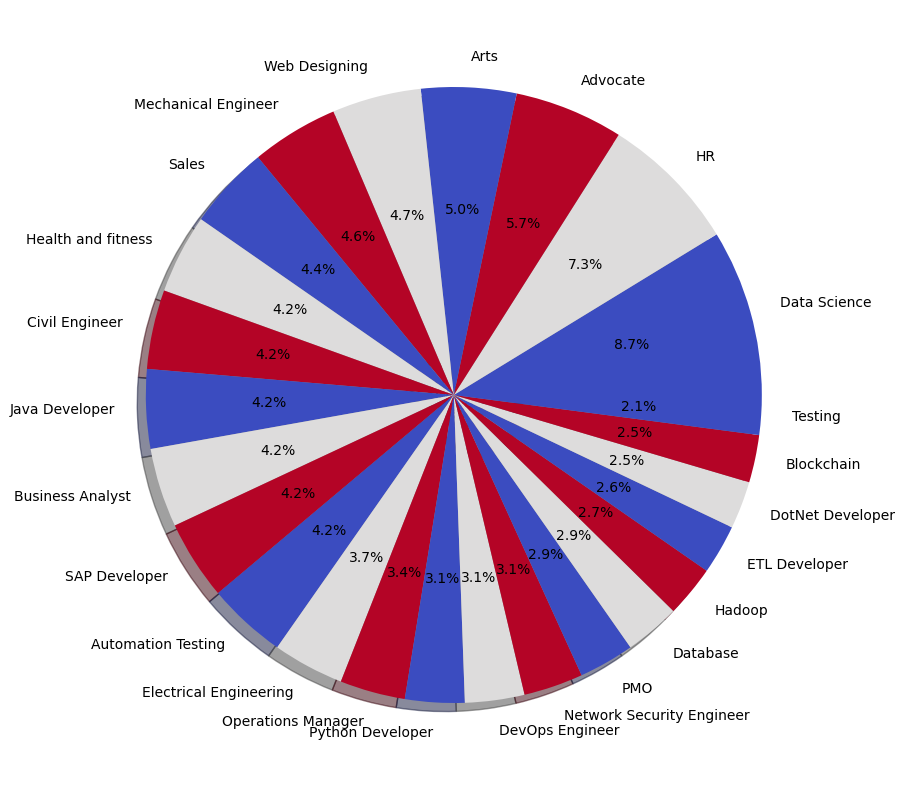

In [61]:
# Now i will check same thing in Pie

counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15, 10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors = plt.cm.coolwarm(np.linspace(0,1,3)))
plt.show();


# This code creates a pie chart displaying the distribution of categories in the DataFrame,
# with each slice labeled according to unique category names and showing the percentage of each category. 
# It also adds shadows to the slices for better visual separation and uses a color palette from cool to warm for aesthetic variation.

# Exploring Resume

In [62]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [63]:
df['Category'][0]

'Data Science'

In [64]:
df['Resume'][0]
#Extracting First resume

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning Data
1. URLs,
2. hashtags,
3. mentions,
4. special letters,
5. punctuations:

This Python function, cleanResume, utilizes the re (regular expression) library to remove various elements commonly found in resumes such as URLs, retweets, hashtags, and special characters. It replaces these elements with whitespace, effectively cleaning the input text txt from any unwanted artifacts. The re module is a built-in Python library used for working with regular expressions, enabling powerful text pattern matching and manipulation capabilities.

In [65]:
import re 

def cleanResume(txt):
    cleanText = re.sub(r'http\S+\s', ' ', txt)
    cleanText = re.sub(r'RT|cc', ' ', cleanText)
    cleanText = re.sub(r'#\S+\s', ' ', cleanText)
    cleanText = re.sub(r'@\S+', '  ', cleanText)  
    cleanText = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub(r'\s+', ' ', cleanText)
    return cleanText



# example
"my website like is this http://heloword"  --> i want to remove https://heloword

In [66]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [67]:
# This code applies the cleanResume function to each element in the 'Resume' column of the DataFrame df, effectively cleaning each resume text.

df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [68]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

# words into categorical values

- pip install scikit-learn
- This is supervised learning
- one input feature(resume) and one output column(category)
- This is a classification problem
- multi label(18-20 labels we have here)
- In clasification we have two label true(0) and false(1)

In [69]:
df

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,Testing,Computer Skills Proficient in MS office Word B...
958,Testing,Willingness to a ept the challenges Positive ...
959,Testing,PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


After importing the LabelEncoder class from the sklearn.preprocessing module, the code creates an instance of LabelEncoder named le. The LabelEncoder is a utility class in scikit-learn used for encoding categorical labels with numerical values, which is often necessary for certain machine learning algorithms that require numerical inputs. It assigns a unique integer to each category in the dataset, thereby transforming categorical data into a format suitable for machine learning models.

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

This code fits the LabelEncoder le to the 'Category' column of the DataFrame df, assigning a unique integer to each category. Then, it transforms the 'Category' column by replacing category names with their corresponding encoded integer values.

In [71]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [72]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [73]:
print(df['Category'])

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64


In [74]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [75]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

# Vactorization

In [76]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

This code utilizes the TfidfVectorizer from scikit-learn to convert the text data in the 'Resume' column of the DataFrame df into a matrix of TF-IDF features. It removes common English stop words during the transformation. Finally, it fits the TfidfVectorizer to the 'Resume' data and transforms it into a matrix of TF-IDF features named requiredText.

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt = tfidf.transform(df['Resume'])


In [78]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


0 -> This is resume one
1 -> That was resume two


#vectorization

This is resume one -> [1 0 0 0](vector1) it write 1 here becoz 'this' word is 1 time so it's write one(1) in vector
                      [0 1 0 0](vector2)
                      [0 0 1 0](vector3)
                      [0 0 0 1](vector4)

That was resume two -> [1 0 0 0](vector1)
                       [0 1 0 0](vector2)
                       [0 0 1 0](vector3)
                       [0 0 0 1](vector4)

like we have one more formula here we have 2 sentences/document/row after counting the number of word in single sentence it will also check in next sentence that some word are matching or not

In [79]:
requredTaxt

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

# Splitting

In [80]:
#(shift+tab)-for shortcut

from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

In [83]:
X_train.shape

(769, 7351)

In [84]:
X_test.shape

(193, 7351)

# Now i will train the model and print the Classification Report:

This code utilizes the K-Nearest Neighbors (KNN) algorithm for multi-class classification. It initializes a classifier (clf) using the OneVsRestClassifier wrapper to handle multiple classes. The classifier is trained on the training data (X_train and y_train), then predicts the class labels for the test data (X_test). Finally, it evaluates the accuracy of the predictions using the accuracy_score function and prints the result.

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

#clf means classifier

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [86]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

# Prediction System

This code saves the TF-IDF vectorizer (tfidf) and the trained classifier (clf) as binary files using the pickle module. The saved files are named 'tfidf.pkl' and 'clf.pkl' respectively.

In [88]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [89]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 6114nrsa3ed@gmail.com
Phone: 03442826189
Github: https://github.com/6114nrorsaed
Linkdin: https://www.linkedin.com/in/noor-saed654a432563/
Blogs: https://medium12.com/@511norsaed
Youtube: MY Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NAMAN SINGH
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

Pickle:->
In short, pickle is a Python module that allows you to save Python objects to a file and load them back into memory later. It's useful for saving the state of your program, transferring data between Python programs, and handling complex data structures. However, be cautious about security risks when unpickling data from untrusted sources, and be aware of potential compatibility issues between different Python versions

This code loads a trained classifier from a file using the pickle module. It then prepares a resume for classification by cleaning it and transforming it using a pre-trained TfidfVectorizer (tfidf). After cleaning and transforming the resume, it predicts the category of the resume using the loaded classifier (clf). Finally, it maps the predicted category ID to its corresponding name using a predefined mapping (category_mapping) and prints the predicted category name.

In [91]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6
